In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import ast 

In [3]:
data = pd.read_csv(f"s3://project-b-new/LOB_csv/LOB_csv2/2022-02-01-LOB-B02.csv")

In [4]:
data

,Time,Bid,Ask,Date
0,0.000,[],[],2022-02-01
1,0.017,[],[],2022-02-01
2,0.034,[],[],2022-02-01
3,0.051,[],[],2022-02-01
4,0.068,[],[],2022-02-01
...,...,...,...,...
1799995,30599.915,"[[168, 5], [161, 2], [129, 3], [107, 4], [106,...","[[262, 4], [278, 1], [294, 5], [386, 2], [429,...",2022-02-01
1799996,30599.932,"[[168, 5], [161, 2], [129, 3], [107, 4], [106,...","[[262, 4], [278, 1], [294, 5], [386, 2], [429,...",2022-02-01
1799997,30599.949,"[[168, 5], [161, 2], [129, 3], [107, 4], [106,...","[[262, 4], [278, 1], [294, 5], [386, 2], [429,...",2022-02-01
1799998,30599.966,"[[168, 5], [161, 2], [129, 3], [107, 4], [106,...","[[262, 4], [278, 1], [294, 5], [386, 2], [429,...",2022-02-01


In [5]:
import numpy as np
def new_bid(bid):
    vol = 0
    price = 0
    if type(bid) != float:
        new_bid = ast.literal_eval(bid)
        new_bid = np.array(new_bid)
        if new_bid.size !=0:
            for item in new_bid:
                vol+= item[1]
                price+= item[0]*item[1]
            return price/vol
        else:
            return 0
    else:
        return 0

In [6]:
data['new_bid'] = data.apply(lambda bid: new_bid(bid['Bid']), axis=1)

In [81]:
def new_ask(ask):
    vol = 0
    price = 0
    if type(ask) != float:
        new_ask = ast.literal_eval(ask)
        new_ask = np.array(new_ask)
        if new_ask.size !=0:
            for item in new_ask:
                vol+= item[1]
                price+= item[0]*item[1]
            return price/vol
        else:
            return 0
    else:
        return 0

In [82]:
data['new_ask'] = data.apply(lambda ask: new_ask(ask['Ask']), axis=1)

In [7]:
X = data["Time"]

In [8]:
type(X)

pandas.core.series.Series

In [10]:
X

0              0.000
1              0.017
2              0.034
3              0.051
4              0.068
             ...    
1799995    30599.915
1799996    30599.932
1799997    30599.949
1799998    30599.966
1799999    30599.983
Name: Time, Length: 1800000, dtype: float64

In [11]:
y = data["new_bid"]

In [12]:
X[::2000]

0              0.0
2000          34.0
4000          68.0
6000         102.0
8000         136.0
            ...   
1790000    30430.0
1792000    30464.0
1794000    30498.0
1796000    30532.0
1798000    30566.0
Name: Time, Length: 900, dtype: float64

In [13]:
X[0:3].values

array([0.   , 0.017, 0.034])

In [14]:
len(y.values)

1800000

In [15]:
(y.values[::2000])

array([  0.        , 141.8       , 150.57142857, 140.60416667,
       138.82692308, 154.80327869, 131.0754717 , 117.0877193 ,
       131.53658537, 122.015625  , 147.72222222, 131.39285714,
       145.4516129 , 161.68888889, 147.04545455, 150.45652174,
       146.46      , 126.43243243, 126.84      , 132.125     ,
       146.13333333, 149.375     , 135.19354839, 124.6       ,
       107.91176471, 140.51515152, 142.27083333, 131.92982456,
       134.87719298, 145.09375   , 135.05      , 142.14285714,
       152.11627907, 132.23404255, 115.12      , 118.32258065,
       134.02173913, 134.39344262, 159.34042553, 121.20689655,
       159.45454545, 143.13043478, 149.58181818, 139.60416667,
       136.75      , 136.47826087, 139.18367347, 115.20408163,
       117.30188679, 122.05263158, 143.05454545, 161.26415094,
       140.75      , 148.92682927, 121.04761905, 138.06122449,
       150.85507246, 119.        , 107.18181818,  88.74074074,
        50.91666667, 135.97222222, 105.80952381, 117.  

In [16]:
y

0            0.000000
1            0.000000
2            0.000000
3            0.000000
4            0.000000
              ...    
1799995    122.818182
1799996    122.818182
1799997    122.818182
1799998    122.818182
1799999    122.818182
Name: new_bid, Length: 1800000, dtype: float64

In [63]:
df = pd.DataFrame(dict(sine=y.values[::20]), index=X[::20], columns=['sine'])
print(df)

                sine
Time                
0.00        0.000000
0.34        0.000000
0.68        0.000000
1.02        0.000000
1.36        0.000000
...              ...
30598.30   82.766667
30598.64   99.166667
30598.98  106.310345
30599.32   92.375000
30599.66  112.777778

[90000 rows x 1 columns]


In [64]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

72000 18000


In [65]:
train

,sine
Time,
0.00,0.000000
0.34,0.000000
0.68,0.000000
1.02,0.000000
1.36,0.000000
...,...
24478.30,128.583333
24478.64,124.326087
24478.98,115.714286


In [66]:
test

,sine
Time,
24480.00,118.162791
24480.34,113.083333
24480.68,95.875000
24481.02,104.958333
24481.36,108.081633
...,...
30598.30,82.766667
30598.64,99.166667
30598.98,106.310345


In [67]:
test.index.to_numpy().shape

(18000,)

In [68]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [69]:
X_train, y_train = create_dataset(train, train.sine, 1)
X_test, y_test = create_dataset(test, test.sine, 1)
print(X_train.shape, y_train.shape)

(71999, 1, 1) (71999,)


In [70]:
X_train[:20,:,:]

array([[[  0.        ]],

       [[  0.        ]],

       [[  0.        ]],

       [[  0.        ]],

       [[  0.        ]],

       [[  0.        ]],

       [[142.        ]],

       [[142.        ]],

       [[135.14285714]],

       [[138.41666667]],

       [[145.5       ]],

       [[146.875     ]],

       [[147.375     ]],

       [[149.625     ]],

       [[150.375     ]],

       [[165.55      ]],

       [[158.64      ]],

       [[158.7       ]],

       [[164.39393939]],

       [[167.18181818]]])

In [71]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc


model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=328,return_sequences = True,
  input_shape=(X_train.shape[1], X_train.shape[2])
))

model.add(keras.layers.LSTM(
  units=50,
))
model.add(keras.layers.Dense(units=8))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001))

In [72]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/5
4050/4050 [==============================] - 18s 5ms/step - loss: 851.8649 - val_loss: 124.7420
Epoch 2/5
4050/4050 [==============================] - 18s 4ms/step - loss: 129.0142 - val_loss: 124.3120
Epoch 3/5
4050/4050 [==============================] - 18s 4ms/step - loss: 125.6421 - val_loss: 125.7302
Epoch 4/5
4050/4050 [==============================] - 18s 4ms/step - loss: 123.5989 - val_loss: 127.3385
Epoch 5/5
4050/4050 [==============================] - 18s 4ms/step - loss: 122.3526 - val_loss: 128.3454


In [73]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'LSTM One Day')

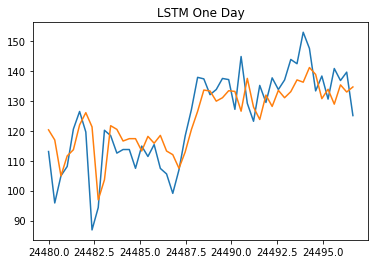

In [78]:
fig, ax = plt.subplots()
ax.plot(test.index.to_numpy()[:50],y_test[0:50])
ax.plot(test.index.to_numpy()[:50],y_pred[0:50])
ax.set_title("LSTM One Day")

